# データセット紹介
2017/01/11時点

使用したもの
* python3.5.2
* pandas_reader0.1(時系列データを扱うpythonライブラリ)

pandas形式で取得可能なサイト一覧
* Yahoo! Finance
* Google Finance
* Enigma(APIキー必要)
* St.Louis FED
* Kenneth French’s data library
* World Bank
* OECD
* Eurostat
* Thrift Savings Plan
* Oanda currency historical rate
* Nasdaq Trader symbol definitions<remote_data.nasdaq_symbols
* Quandl(APIキー必要・一部有料・quandlライブラリから取得)

参考サイト
* https://pandas-datareader.readthedocs.io/en/latest/remote_data.html

In [9]:
import pandas_datareader
import pandas_datareader.data as web
import datetime
%matplotlib inline

取得期間を2014年全てにする

In [2]:
start = datetime.datetime(2014, 1, 1)
end = datetime.datetime(2014, 12, 31)

## yahoo-finance

In [2]:
aapl_data = web.DataReader(
    'AAPL', 
    'yahoo', 
)
aapl_quotes = web.get_quote_yahoo('AAPL')

株価の日足(4本値、出来高、配当落ち)

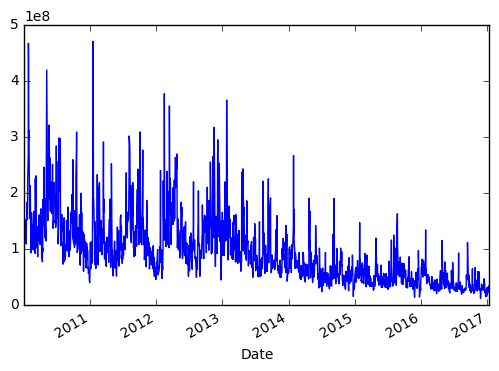

In [10]:
aapl_data['Volume'].plot()

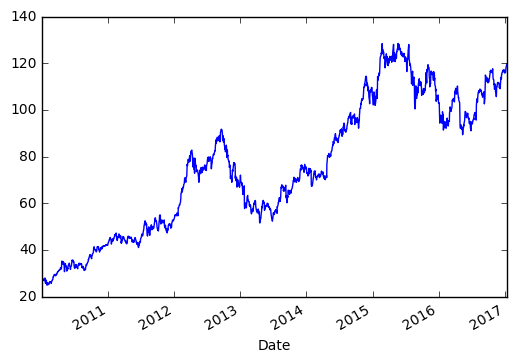

In [3]:
aapl_data['Adj Close'].plot()

株式分割・配当情報

splitは*倍の意味？(1/7=0.14285714285714285)

In [49]:
aapl_actions

,action,value
2014-11-06,DIVIDEND,0.470000
2014-08-07,DIVIDEND,0.470000
2014-06-09,SPLIT,0.142857
2014-05-08,DIVIDEND,0.470000
2014-02-06,DIVIDEND,0.435710


修正した株価

### quotes(株価情報)
* PE
    * Price Earnings ratio
    * 時価総額 / 純利益
* change_pct: ?
* PE計算時(last)の株価
* short_ration
    * 空売り比率
    * 残高株数 / (直近数十日間の?)出来高 * 100 

In [68]:
pandas_datareader.data.get_quote_yahoo('AAPL')

,PE,change_pct,last,short_ratio,time
AAPL,14.32,N/A,118.99,1.45,4:00pm


現在、オプション価格はライブラリを通して使えなくなってる。<br>
ただしYahoo Financeで閲覧できるので、スクレイピングすることは可能

パラメータ
* pull, callの2種類
* 期日

返り値
* 4本足
* %Change
* Volume
* Open Interest

### FRED

アメリカの経済指標データベース<br>
GDP: gross domestic product (四半期ごと）

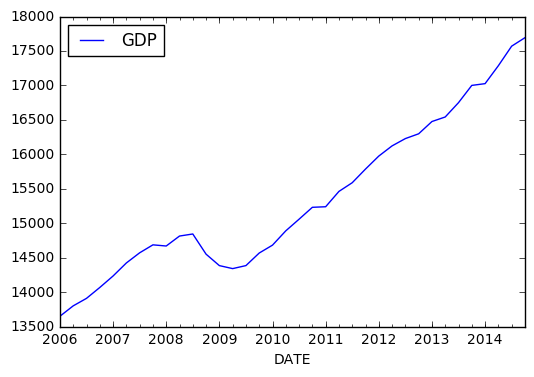

In [34]:
old_start = datetime.datetime(2006, 1, 1)
gdp = web.DataReader('GDP', 'fred', old_start, end)
gdp.plot()

CPI
* インフレ、デフレの指標
* 食べ物・エネルギーはインフレ等の指標に役立たないとされて、調整済指標としてCPILFESLがよく使われる
* そのままの値がCPIAUCSL

CPIAUCSL: Consumer Price Index for All Urban Consumers<br>
CPILFESL: Consumer Price Index for Less Food & Energy 

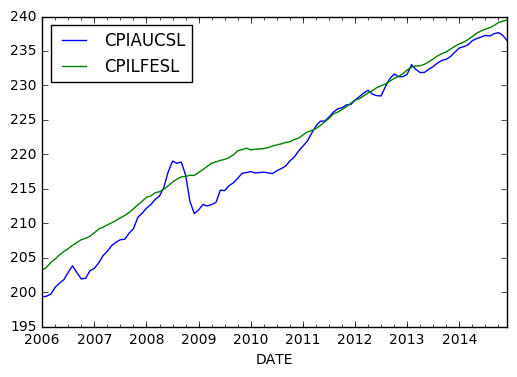

In [36]:
inflation = web.DataReader(["CPIAUCSL", "CPILFESL"], "fred", old_start, end)
inflation.plot()

Fame/Frenchでも似たようなデータがある

## World Bank

In [30]:
dat = wb.download(indicator='NY.GDP.PCAP.KD', country=['US', 'CA', 'MX'], start=2005, end=2008)
dat

NY.GDP.PCAP.KD
country       year                
Canada        2008    48508.815279
              2007    48550.942415
              2006    48033.300476
              2005    47179.857911
Mexico        2008     9126.924423
              2007     9146.747106
              2006     9002.539631
              2005     8706.175363
United States 2008    49364.644550
              2007    49979.533843
              2006    49575.401014
              2005    48755.616061

### OECD: Organisation for Economic Co-operation and Developmen

Trade union density 
* Trade union density corresponds to the ratio of wage and salary earners that are trade union members, divided by the total number of wage and salary earners (OECD Labour Force Statistics). Density is calculated using survey data, wherever possible, and administrative data adjusted for non-active and self-employed members otherwise. Data are expressed in percentages and presented from 1980.

(http://www.oecd-ilibrary.org/employment/data/trade-unions/trade-union-density_data-00371-en)

In [27]:
df = web.DataReader('UN_DEN', 'oecd', end=end)
df[['United States', 'United Kingdom', 'Italy', 'Japan', 'Korea',  'OECD countries',  'Mexico']]

Country,United States,United Kingdom,Italy,Japan,Korea,OECD countries,Mexico
Time,,,,,,,
2010-01-01,11.383460,26.600727,36.044973,18.403807,9.681449,17.696165,14.376325
2011-01-01,11.329488,25.820017,36.329166,18.995042,9.886705,17.595703,14.495793
2012-01-01,10.815352,26.042792,36.860522,17.972384,10.145607,17.161429,13.617932
2013-01-01,10.807891,25.796752,37.289097,17.783180,NaN,17.022305,13.622013
2014-01-01,10.650230,25.141856,NaN,17.603217,NaN,16.730148,13.531985


In [20]:
fname = '/home/nikke/git_dir/python/algo_trade/data/sandp500.sqlite'
import pandas as pd
import subprocess


In [22]:
aapl_data

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,213.429998,214.499996,212.380001,214.009998,123432400,27.847252
2010-01-05,214.599998,215.589994,213.249994,214.379993,150476200,27.895396
2010-01-06,214.379993,215.230000,210.750004,210.969995,138040000,27.451683
2010-01-07,211.750000,212.000006,209.050005,210.580000,119282800,27.400936
2010-01-08,210.299994,212.000006,209.060005,211.980005,111902700,27.583106
2010-01-11,212.799997,213.000002,208.450005,210.110003,115557400,27.339779
2010-01-12,209.189995,209.769995,206.419998,207.720001,148614900,27.028789
2010-01-13,207.870005,210.929995,204.099998,210.650002,151473000,27.410045
2010-01-14,210.110003,210.459997,209.020004,209.430000,108223500,27.251297
